<a href="https://colab.research.google.com/github/elyianaa/SECB4313-Bioinformatics-Modelling-Simulations/blob/main/Lab1%20Heart%20Disease%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Data

In [ ]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [6]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/SECBH/20232024 SEM 2/"
model_loc = "/content/gdrive/My Drive/SECBH/20232024 SEM 2/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Lab1.ipynb', 'STB W3 Elyiana & Marnisha.gdoc', 'heart.csv']


##EDA

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
len(data)

303

In [11]:
print("Dataset Shape: ", data.shape)
data.info()

Dataset Shape:  (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Checking duplicated values
data.duplicated().any()

True

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().any()

False

In [17]:
data.shape

(302, 14)

##Data Preprocessing

In [19]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

ans = '''
The purpose of the provided code is to prepare
categorical variables in the dataset for use in
machine learning algorithms by converting them
to the object data type, which is suitable for
representing categorical or nominal variables.
'''
print(ans)


The purpose of the provided code is to prepare
categorical variables in the dataset for use in
machine learning algorithms by converting them
to the object data type, which is suitable for
representing categorical or nominal variables.



In [21]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

In [22]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

ans = '''
line 3: extracts the values of the 'target' column
line 4: reshape y array into 1 dimension
line 5: drop target in x data
'''

print(ans)
y.shape


line 3: extracts the values of the 'target' column
line 4: reshape y array into 1 dimension
line 5: drop target in x data



(302, 1)

In [24]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

data = pd.DataFrame({'A': [10, 20, 30], 'B': [100, 200, 300], 'C': [1000, 2000, 3000]})
print('Original dataset:')
print(data)

minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print('\nNormalized dataset:')
print(data_norm)

Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000

Normalized dataset:
     A    B    C
0  0.0  0.0  0.0
1  0.5  0.5  0.5
2  1.0  1.0  1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [25]:
### 8. Describe the heart dataset after implementing the min max normalization

# Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

ans = '''
After applying min-max normalization to the heart dataset,
each feature's values are rescaled to the range between 0 and 1,
ensuring uniformity and enabling easier interpretation and
comparison across features.
'''

print(ans)


After applying min-max normalization to the heart dataset, 
each feature's values are rescaled to the range between 0 and 1, 
ensuring uniformity and enabling easier interpretation and 
comparison across features.



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


##Train Test Split

In [26]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.3/0.7, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(120, 21)
(91, 21)
(91, 21)


##Model Training and Evaluation

In [27]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

ans = '''
The purpose of each layer in the provided neural network is to
process the input data, extract features through hidden layers,
and produce the final predictions or outputs through the output
layer, with specific activation functions chosen based on the
requirements of the case study.
'''

print(ans)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

The purpose of each layer in the provided neural network is to 
process the input data, extract features through hidden layers, 
and produce the final predictions or outputs through the output 
layer, with specific activation functions chosen based on the 
requirements of the case stu

In [28]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

ans = '''
1. The loss function is a measure of how well the model's predictions
match the true labels during training.
2. The optimizer determines how the model weights are updated during
training to minimize the loss function.
3. Metrics are additional performance measures used to evaluate
the model during training and/or testing.
'''

print(ans)


1. The loss function is a measure of how well the model's predictions 
match the true labels during training.
2. The optimizer determines how the model weights are updated during 
training to minimize the loss function.
3. Metrics are additional performance measures used to evaluate 
the model during training and/or testing.



In [29]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
8/8 [==============================] - 3s 76ms/step - loss: 0.2473 - acc: 0.5667 - val_loss: 0.2500 - val_acc: 0.5165
Epoch 2/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.2459 - acc: 0.5667 - val_loss: 0.2500 - val_acc: 0.5165
Epoch 3/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.2448 - acc: 0.5667 - val_loss: 0.2497 - val_acc: 0.5165
Epoch 4/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.2435 - acc: 0.5667 - val_loss: 0.2493 - val_acc: 0.5165
Epoch 5/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2412 - acc: 0.5667 - val_loss: 0.2468 - val_acc: 0.5165
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2381 - acc: 0.5667 - val_loss: 0.2422 - val_acc: 0.5165
Epoch 7/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.2319 - acc: 0.5667 - val_loss: 0.2364 - val_acc: 0.5165
Epoch 8/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2240 - a

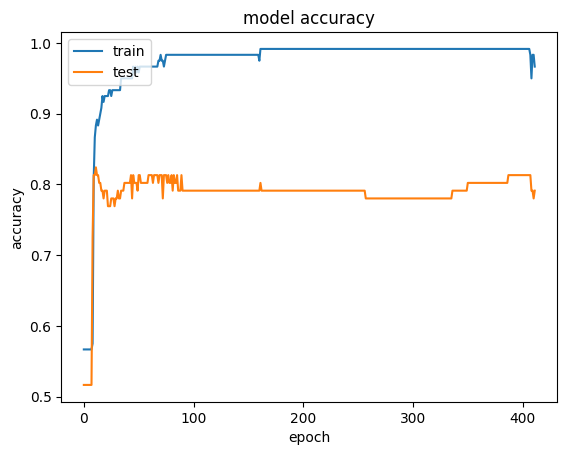


The plot shows that the accuracy of the train model achieve consistency 
nearly 1.0 at each epoch while the accuracy of test model achieve
consistency of nearly 0.8 along the epoch.



In [31]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

ans = '''
The plot shows that the accuracy of the train model achieve consistency
nearly 1.0 at each epoch while the accuracy of test model achieve
consistency of nearly 0.8 along the epoch.
'''

print(ans)

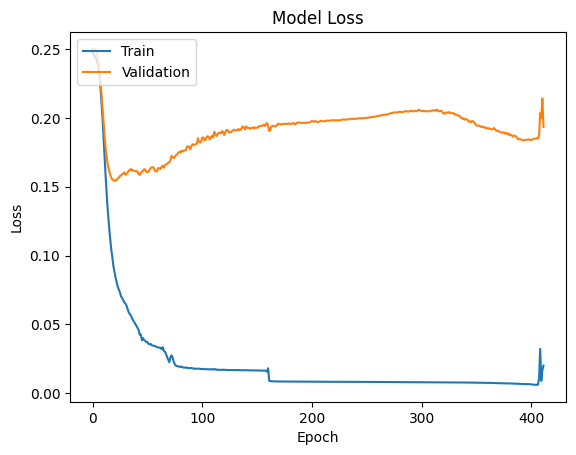

In [33]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])  # Plot training loss
plt.plot(output.history['val_loss'])  # Plot validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

ans = '''
Evaluating the model on the test dataset provides insight
into its generalization performance, helps detect overfitting,
and reports final performance metrics such as accuracy and loss.
'''
print(ans)

3/3 [==============================] - 0s 5ms/step - loss: 0.1718 - acc: 0.8132

acc: 81.32%
loss: 0.17

Evaluating the model on the test dataset provides insight 
into its generalization performance, helps detect overfitting,
and reports final performance metrics such as accuracy and loss.



In [35]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

3/3 [==============================] - 0s 3ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: Pa


1. Confusion Matrix is a table that summarizes the performance of a 
classification model by comparing predicted labels with true labels, 
helping to evaluate the model's accuracy and identify errors.
2. TP: The number of correctly predicted positive instances.
3. FP: The number of incorrectly predicted positive instances.
4. FN: The number of incorrectly predicted negative instances.
5. TN: The number of correctly predicted negative instances.



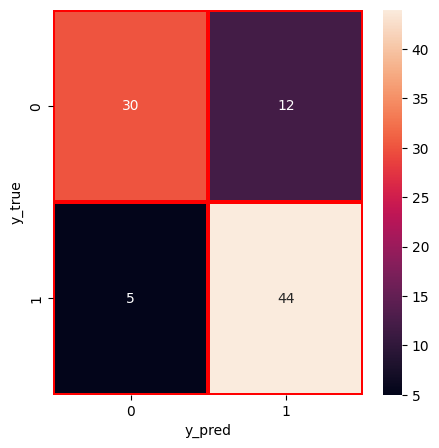


              precision    recall  f1-score   support

           0       0.86      0.71      0.78        42
           1       0.79      0.90      0.84        49

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91


The classification report summarizes key metrics such as precision, 
recall, F1-score, and support for each class in a classification problem, 
providing insights into the model's performance and helping to assess 
its effectiveness in correctly classifying instances.



In [36]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.

ans = '''
1. Confusion Matrix is a table that summarizes the performance of a
classification model by comparing predicted labels with true labels,
helping to evaluate the model's accuracy and identify errors.
2. TP: The number of correctly predicted positive instances.
3. FP: The number of incorrectly predicted positive instances.
4. FN: The number of incorrectly predicted negative instances.
5. TN: The number of correctly predicted negative instances.
'''
print(ans)

### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

ans = '''
The classification report summarizes key metrics such as precision,
recall, F1-score, and support for each class in a classification problem,
providing insights into the model's performance and helping to assess
its effectiveness in correctly classifying instances.
'''
print(ans)